In [5]:
from utils import *

(3, 140)


D:\software\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\software\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[7.31618359e-01 1.00281733e-13 2.68388160e-01 8.74187137e-11]
 [7.56972413e-02 9.74427085e-02 8.26861245e-01 6.87476165e-13]
 [9.53824124e-01 2.46418970e-14 4.61777846e-02 1.32168124e-17]
 [3.71795465e-01 1.66253097e-04 6.28041086e-01 1.35473848e-24]]


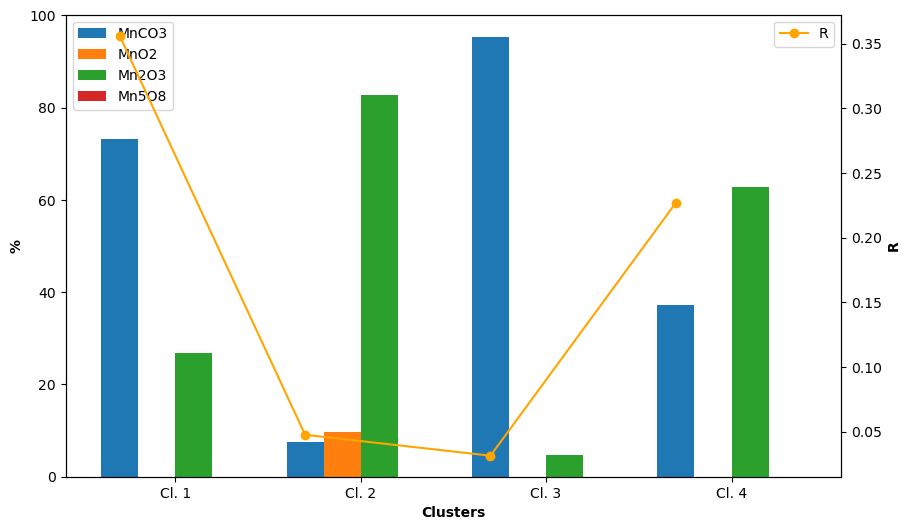

In [6]:
# 示例使用
file1 = 'MnCO3.dat'
file2 = 'Mn5O8.dat'
file3 = 'MnO2.dat'
data = read_and_process_dat_file(file1)
reference_MnCO3, reference_Mn2O3 = define_references(data)
reference_Mn5O8 = Reference(read_and_process_dat_file(file2)[:, 1], 'Mn5O8')
reference_MnO2 = Reference(read_and_process_dat_file(file3)[:, 1], 'MnO2')
references = [reference_MnCO3, reference_MnO2, reference_Mn2O3, reference_Mn5O8]

X = data[:, 1:]
X_reduced = pca_reduction(X)
labels = kmeans_clustering(X_reduced, n_clusters=4)  # 假设聚类数目为3
cluster_means = np.array([X[:, labels == label].mean(axis=1) for label in np.unique(labels)])
coefficients, R_values = process_cluster_means(cluster_means, references)

plot_results(coefficients, R_values, references)

D:\software\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\software\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\software\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31614 (\N{CJK UNIFIED IDEOGRAPH-7B7E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\software\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21442 (\N{CJK UNIFIED IDEOGRAPH-53C2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\software\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32771 (\N{CJK UNIFIED IDEOGRAPH-8003}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\so

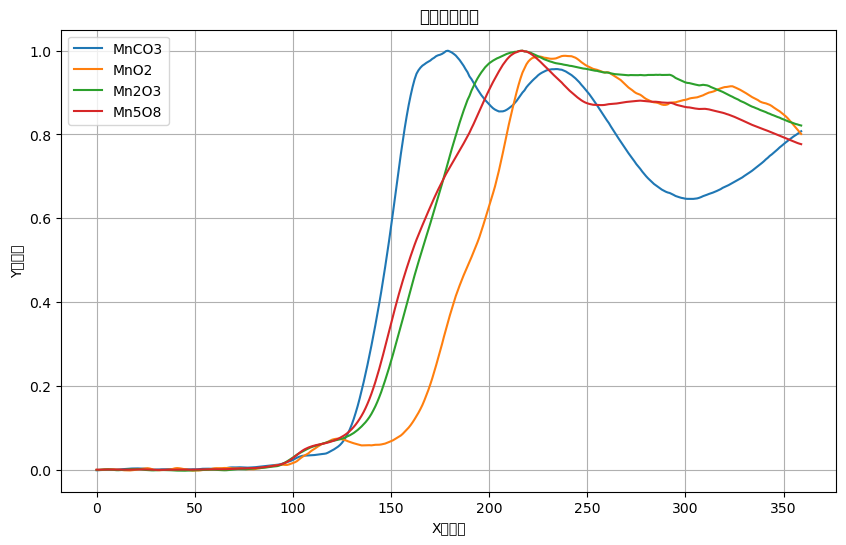

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 绘制图形
plt.figure(figsize=(10, 6))

for ref in references:
    plt.plot(ref.data, label=ref.name)

plt.xlabel('X轴标签')  # 根据实际情况替换
plt.ylabel('Y轴标签')  # 根据实际情况替换
plt.title('参考数据绘制')
plt.legend()
plt.grid(True)
plt.show()